The aim of this analysis is to find out the key performance-related differences between budget and high-end electric vehicles?

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# change directory
%cd /content/drive/MyDrive/Colab Notebooks//INST 414/Assignments/Module 1

/content/drive/MyDrive/Colab Notebooks/INST 414/Assignments/Module 1


In [3]:
!ls

 ElectricCarData_Norm.csv  'EV EDA.ipynb'


## **Load & Explore Data**

In [4]:
# Loading data
ev_df = pd.read_csv('ElectricCarData_Norm.csv')
ev_df.head(10)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8 sec,250 km/h,610 km,180 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6 sec,150 km/h,190 km,168 Wh/km,220 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1 sec,150 km/h,275 km,164 Wh/km,420 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6 sec,225 km/h,310 km,153 Wh/km,650 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3 sec,180 km/h,400 km,193 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


In [5]:
# Getting info from dataframe
print(ev_df.info())
print(ev_df.shape)
print(ev_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB
None
(103, 14)
0


## **Data Cleaning**

In [6]:
# Remove rows containing '-' in 'FastCharge' column
print(ev_df['FastCharge'].unique())
ev_df = ev_df[ev_df.FastCharge != '-']

['940 km/h' '250 km/h' '620 km/h' '560 km/h' '190 km/h' '220 km/h'
 '420 km/h' '650 km/h' '540 km/h' '440 km/h' '230 km/h' '380 km/h'
 '210 km/h' '590 km/h' '780 km/h' '170 km/h' '260 km/h' '930 km/h'
 '850 km/h' '910 km/h' '490 km/h' '470 km/h' '270 km/h' '450 km/h'
 '350 km/h' '710 km/h' '240 km/h' '390 km/h' '570 km/h' '610 km/h'
 '340 km/h' '730 km/h' '920 km/h' '-' '550 km/h' '900 km/h' '520 km/h'
 '430 km/h' '890 km/h' '410 km/h' '770 km/h' '460 km/h' '360 km/h'
 '810 km/h' '480 km/h' '290 km/h' '330 km/h' '740 km/h' '510 km/h'
 '320 km/h' '500 km/h']


In [7]:
# Clean 'Accel' column: remove 'sec' and convert to float
ev_df['Accel'] = ev_df['Accel'].str.replace(' sec', '', regex=False)
ev_df['Accel'] = ev_df['Accel'].astype(float)

# Clean 'TopSpeed' column: remove 'km/h' and convert to int
ev_df['TopSpeed'] = ev_df['TopSpeed'].str.replace(' km/h', '', regex=False)
ev_df['TopSpeed'] = ev_df['TopSpeed'].astype(int)

# Clean'Range' column: remove 'km' and convert to int
ev_df['Range'] = ev_df['Range'].str.replace(' km', '', regex=False)
ev_df['Range'] = ev_df['Range'].astype(int)

# Clean 'Efficiency' column: remove 'Wh/km' and convert to int
ev_df['Efficiency'] = ev_df['Efficiency'].str.replace(' Wh/km', '', regex=False)
ev_df['Efficiency'] = ev_df['Efficiency'].astype(int)

# Clean 'FastCharge' column: remove 'Wh/km' and convert to int
ev_df['FastCharge'] = ev_df['FastCharge'].str.replace(' km/h', '', regex=False)
ev_df['FastCharge'] = ev_df['FastCharge'].astype(int)

Some of the numerical columns are listed as object data types due to the metric units added. I removed the units and converted the columns to the appropriate the data type.

In [8]:
# Renaming columns
ev_df = ev_df.rename(columns={'Accel': 'Accel(sec)', 'TopSpeed': 'TopSpeed(km/h)', 'Range': 'Range(km)', 'Efficiency': 'Efficiency(Wh/km)', 'FastCharge': 'FastCharge(km/h)'})

In [9]:
# Check cleaned data
print(ev_df.info())
ev_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              98 non-null     object 
 1   Model              98 non-null     object 
 2   Accel(sec)         98 non-null     float64
 3   TopSpeed(km/h)     98 non-null     int64  
 4   Range(km)          98 non-null     int64  
 5   Efficiency(Wh/km)  98 non-null     int64  
 6   FastCharge(km/h)   98 non-null     int64  
 7   RapidCharge        98 non-null     object 
 8   PowerTrain         98 non-null     object 
 9   PlugType           98 non-null     object 
 10  BodyStyle          98 non-null     object 
 11  Segment            98 non-null     object 
 12  Seats              98 non-null     int64  
 13  PriceEuro          98 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.5+ KB
None


,Brand,Model,Accel(sec),TopSpeed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,D,5,55000


## **Visualizations**

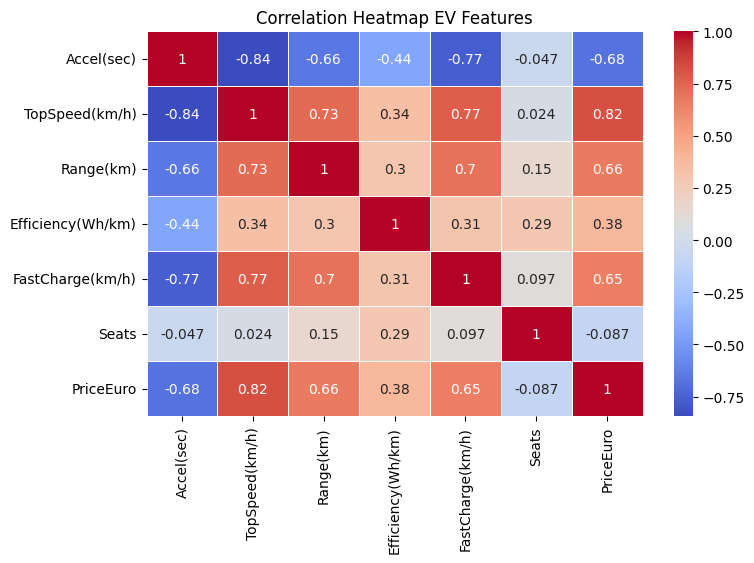

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
corr = ev_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap EV Features')
plt.show()

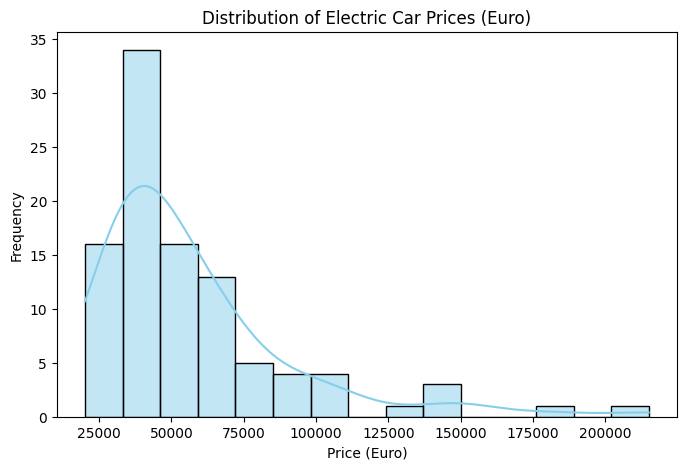

In [11]:
# Histogram: price distribution of EVs
plt.figure(figsize=(8, 5))
sns.histplot(ev_df['PriceEuro'], bins=15, kde=True, color='skyblue')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Car Prices (Euro)')
plt.show()

The histogram of 'PriceEuro' provides a clear overview of how EV prices are distributed in our dataset. The right skew in the histogram indicates that while most EVs are moderately priced, there are a few models that push the upper end of the scale.

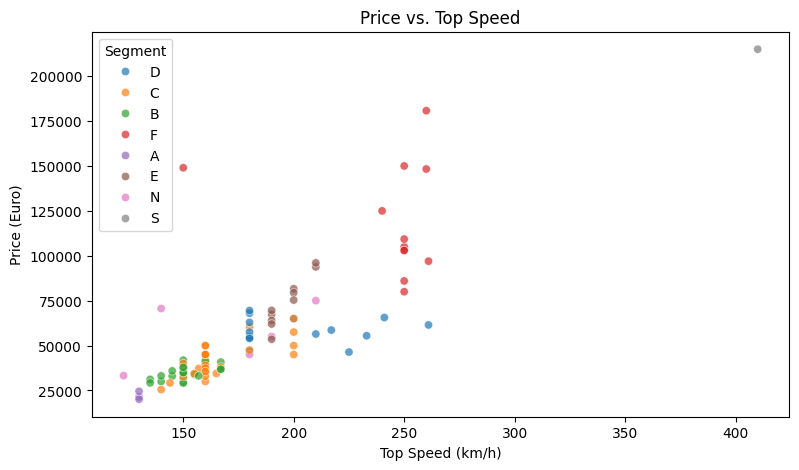

In [12]:
# Scatterplot: Price vs. Top Speed
plt.figure(figsize=(9, 5))
sns.scatterplot(x='TopSpeed(km/h)', y='PriceEuro', hue='Segment', data=ev_df, alpha=0.7)
plt.xlabel('Top Speed (km/h)')
plt.ylabel('Price (Euro)')
plt.title('Price vs. Top Speed')
plt.show()

Analysis shows strong positive correlation (0.82) between PriceEuro and TopSpeed. The scatterplot ilustrates that cheaper EVs usually have lower top speeds compared to the more expensive models.

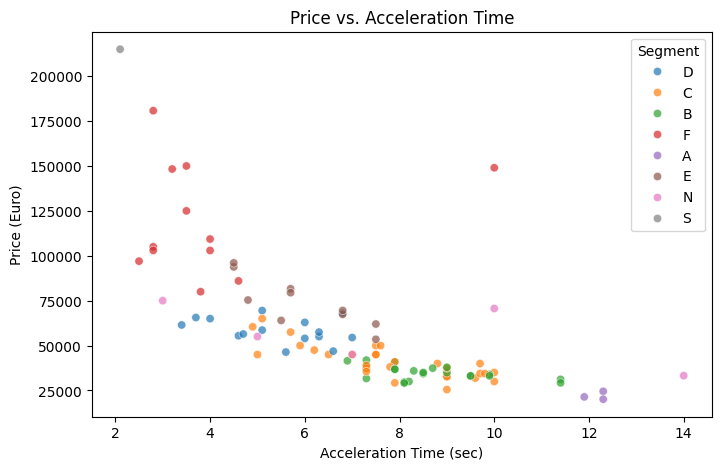

In [13]:
# Scatterplot: Price vs. Acceleration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Accel(sec)', y='PriceEuro', hue='Segment', data=ev_df, alpha=0.7)
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Price (Euro)')
plt.title('Price vs. Acceleration Time')
plt.show()

Analysis shows a strong negative correlation (–0.68) between PriceEuro and Accel. The scatteplot indicates that EVs with higher prices tend to have lower acceleration times; meaning they accelerate faster.

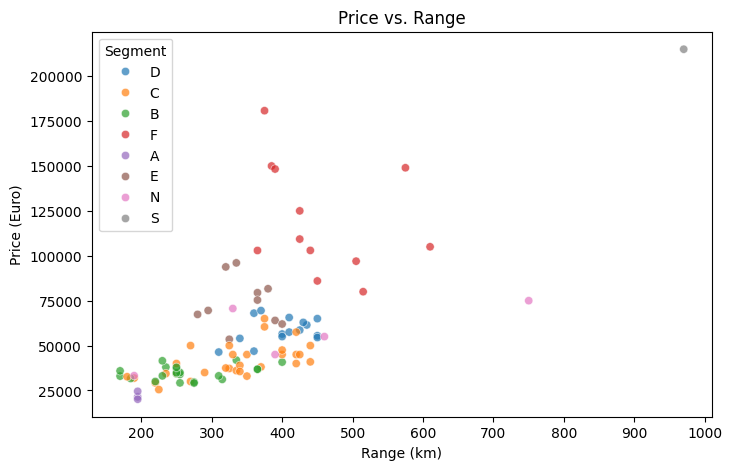

In [14]:
# Scatterplot: Price vs. Range
plt.figure(figsize=(8,5))
sns.scatterplot(x='Range(km)', y='PriceEuro', hue="Segment", data=ev_df, alpha=0.7)
plt.title('Price vs. Range')
plt.xlabel('Range (km)')
plt.ylabel('Price (Euro)')
plt.show()

A moderate positive correlation (0.66) between PriceEuro and Range implies that the more expensive EVS tend to offer longer ranges.

<ipython-input-19-1f14099f8a68>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=segments)


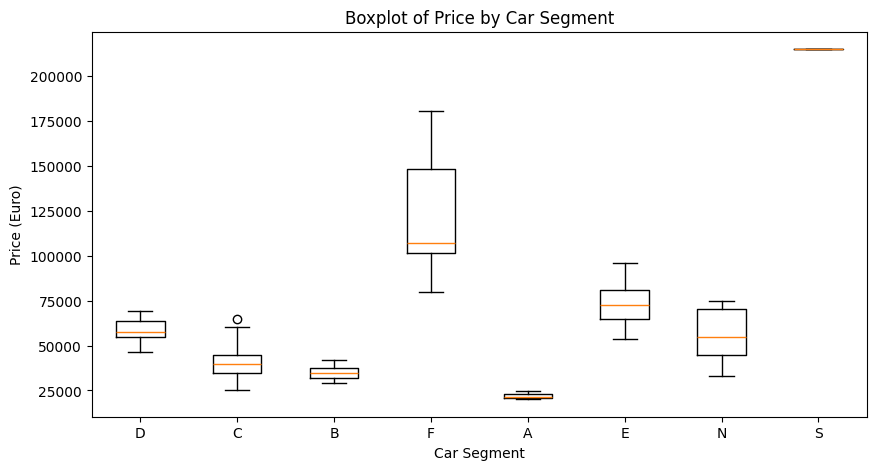

In [19]:
# Boxplot: PriceEuro by Segment
segments = ev_df['Segment'].unique()
data_to_plot = [ev_df[ev_df['Segment'] == seg]['PriceEuro'] for seg in segments]

plt.figure(figsize=(10, 5))
plt.boxplot(data_to_plot, labels=segments)
plt.xlabel('Car Segment')
plt.ylabel('Price (Euro)')
plt.title('Boxplot of Price by Car Segment')
plt.show()

Segments that typically include luxury models exhibit higher median prices and a wider range of values, suggesting that these categories include some premium vehicles with advanced features. Conversely, segments that line up with the more compact EVs show lower median prices and tighter price distributions.

<ipython-input-20-fca5ac7fd9da>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=brands)


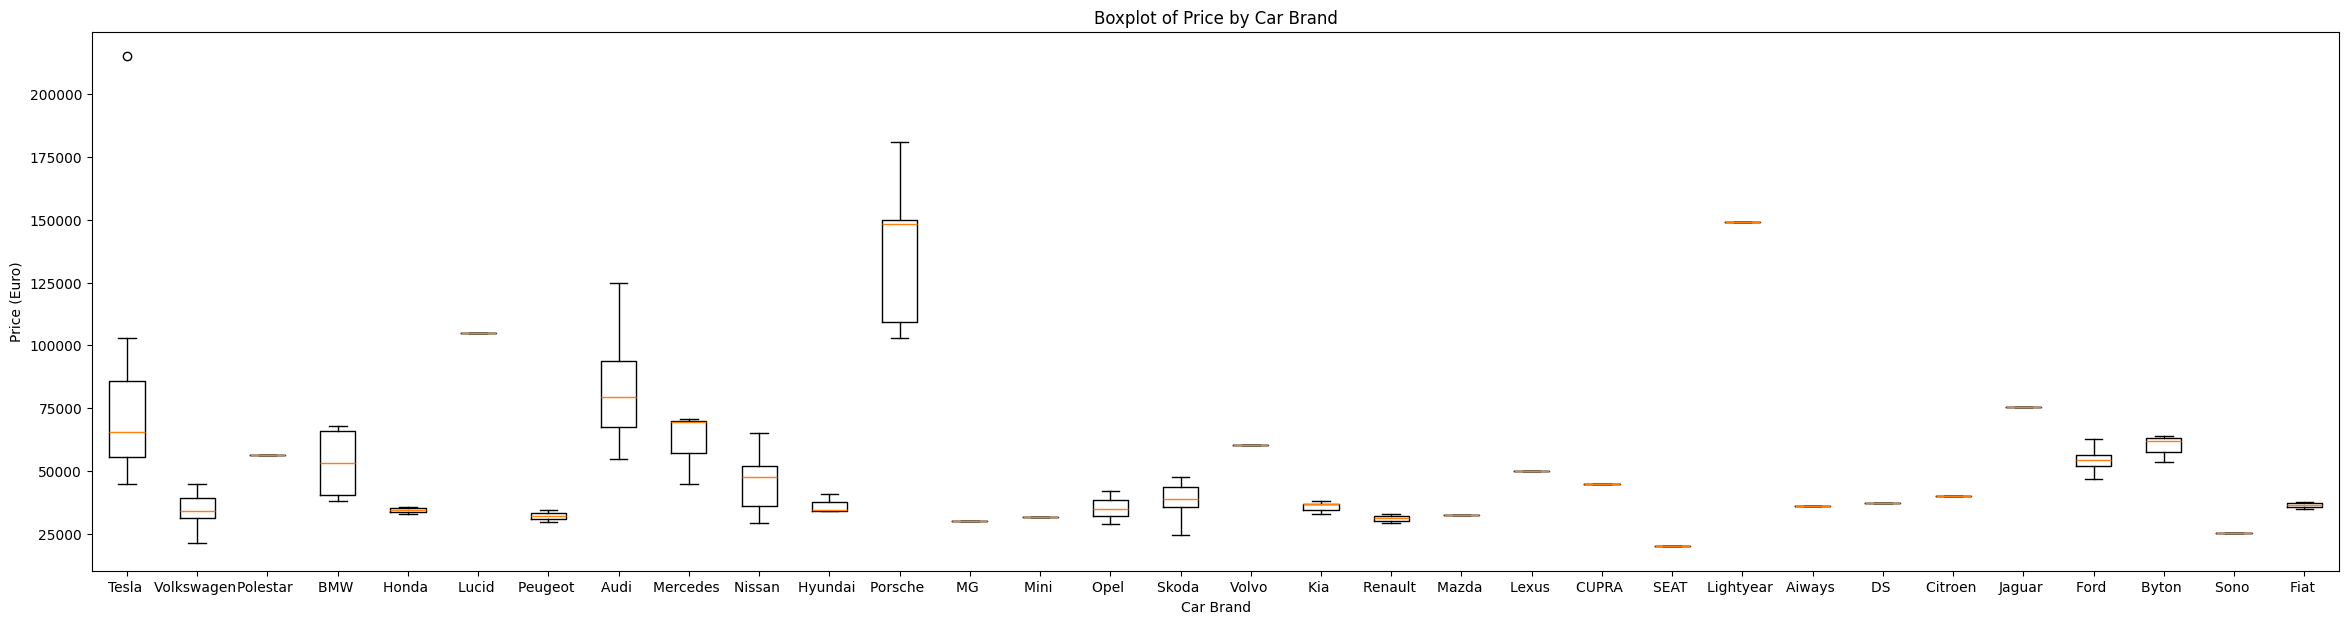

In [20]:
# Boxplot: PriceEuro by Brand
brands = ev_df['Brand'].unique()
data_to_plot = [ev_df[ev_df['Brand'] == car]['PriceEuro'] for car in brands]

plt.figure(figsize=(29, 7))
plt.boxplot(data_to_plot, labels=brands)
plt.xlabel('Car Brand')
plt.ylabel('Price (Euro)')
plt.title('Boxplot of Price by Car Brand')
plt.show()

## **Handling Outliers**

In [17]:
ev_df.describe()

,Accel(sec),TopSpeed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),Seats,PriceEuro
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,7.046939,181.653061,350.153061,189.867347,456.734694,4.959184,57324.683673
std,2.483895,43.248527,118.217984,30.055837,201.262897,0.687418,34288.246370
min,2.100000,123.000000,170.000000,104.000000,170.000000,4.000000,20129.000000
25%,5.100000,150.000000,258.750000,168.000000,275.000000,5.000000,35000.000000
50%,7.300000,167.000000,350.000000,181.000000,440.000000,5.000000,45000.000000
75%,8.950000,200.000000,407.500000,206.000000,560.000000,5.000000,65465.000000
max,14.000000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [18]:
print(ev_df['Accel(sec)'].quantile(0.99))
print(ev_df['TopSpeed(km/h)'].quantile(0.99))
print(ev_df['Range(km)'].quantile(0.99))
print(ev_df['Efficiency(Wh/km)'].quantile(0.99))
print(ev_df['FastCharge(km/h)'].quantile(0.99))
print(ev_df['PriceEuro'].quantile(0.99))

12.351000000000003
265.47000000000014
756.6000000000003
270.09000000000003
930.3
181807.57000000004


I decided not to remove outliers in TopSpeed and PriceEuro because these extreme values capture important differences between budget and premium electric vehicles.

## **Feature Engineering**

In [25]:
# Create new column 'PriceCategory' that labels each EV as 'Budget' or 'Premium'
price_limit = ev_df['PriceEuro'].median()
ev_df['PriceCategory'] = np.where(ev_df['PriceEuro'] <= price_limit, 'Budget', 'Premium')

In [24]:
ev_df[['PriceEuro', 'PriceCategory']].head(10)

,PriceEuro,PriceCategory
0,55480,Premium
1,30000,Budget
2,56440,Premium
3,68040,Premium
4,32997,Budget
5,105000,Premium
6,31900,Budget
7,29682,Budget
8,46380,Premium
9,55000,Premium


I split the dataset into 'Budget' and 'Premium' EVs using the median PriceEuro as the threshold. This creates two groups, which allows me to compare the performance and feature differences between more affordable and high-end vehicles.

## **Conclusion**

High-end EVs are priced higher and deliver faster acceleration, higher top speeds, and longer ranges.  In our data, we saw a strong positive correlation between price and top speed (0.82) and a notable negative correlation between price and acceleration (-0.68), indicating that as EVs get more expensive, they tend to offer significantly better performance in these areas. Budget EVs tend to be more modest in these performance areas, though they might be made for better energy efficiency and affordability.